In [8]:
#Importing the libraries
import pandas as pd
import numpy as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
plt.style.use('ggplot')

In [24]:
#Loading the 2015 dataset
#df_2015='C:/Users/USER/Desktop/2015.csv'


In [6]:

# Loading the 2015 dataset
import pandas as pd
df_2015 = pd.read_csv("C:/Users/USER/Desktop/2015.csv")

In [9]:
#Display a few rows
df_2015.head() 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
#DATA UNDERSTANDING
#data shape
df_2015.shape

(158, 12)

In [15]:
#The columns found in the dataset
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [30]:

#Data types

#df_2015.info()  OR
df_2015.dtypes


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [17]:
#Summary statistics

df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [19]:
#DATA CLEANING
#Missing values 1
df_2015.apply(lambda x:sum(x.isna()),axis=0)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [21]:
#checking for empty values 2
df_2015.isna().sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [23]:
#Checking if there is any duplicate
#df_2015.loc [df_2015.duplicated()] - Gives the location of duplicated values/words
df_2015.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool

In [25]:
#Remove Duplicates

df_2015.drop_duplicates(inplace=True)
df_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [27]:
#Zero values
df_2015.apply(lambda x: sum(x==0),axis=0)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Dystopia Residual                0
dtype: int64

In [29]:
##Standardize categorical data
#Capitalize the first letters in Country and others in lower case
df_2015['Country'] = df_2015['Country'].str.title()
df_2015['Region'] = df_2015['Region'].str.title()

# Ensure that 'Country' and 'Region' are treated as strings
df_2015['Country'] = df_2015['Country'].astype('str')
df_2015['Region'] = df_2015['Region'].astype('str')

# Ensure that 'Happiness Score' is treated as a float
df_2015['Happiness Score'] = df_2015['Happiness Score'].astype('float64')

df_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East And Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


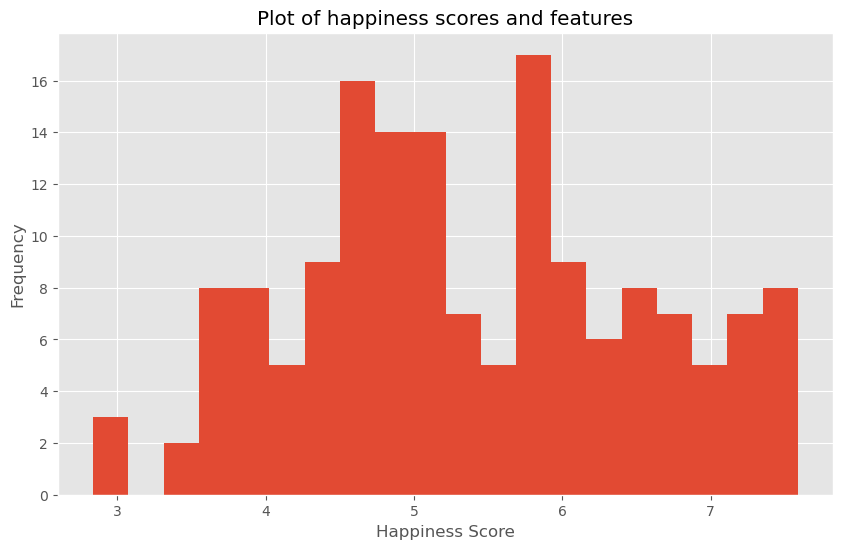

In [43]:
#EDA
#Univariate: Histograms of happiness scores and features.
plt.figure(figsize=(10,6))
df_2015['Happiness Score'].hist(bins=20)
plt.title('Plot of happiness scores and features')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

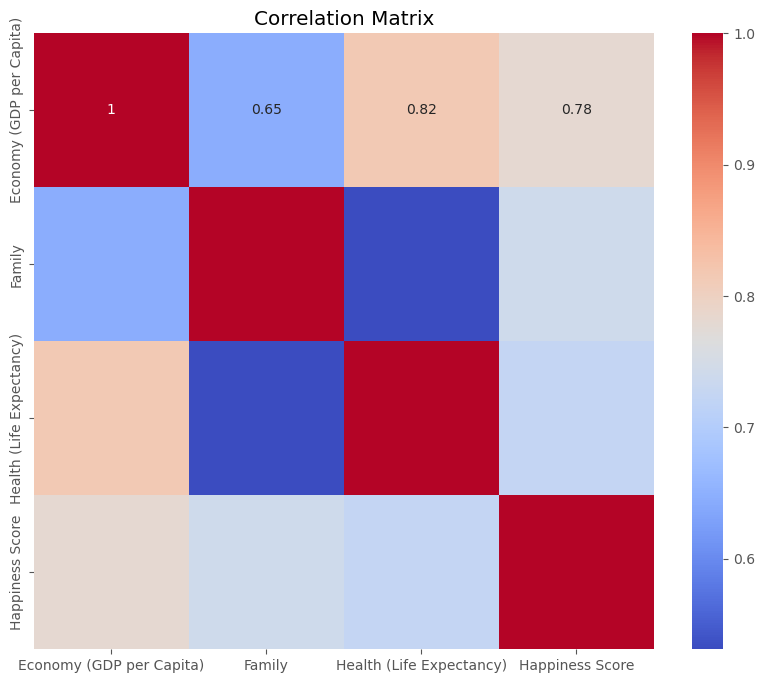

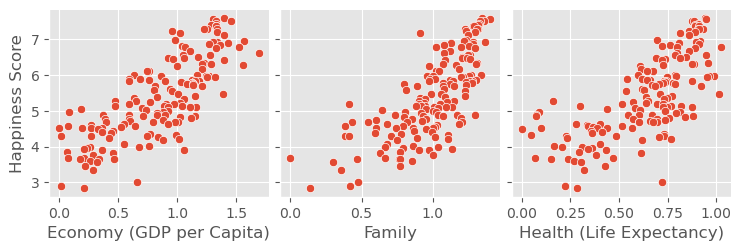

In [31]:
#Bivariate: Correlation matrix and scatter plots

# Select only the numeric columns for correlation analysis and scatter plots
numeric_columns = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Happiness Score']
df_numeric = df_2015[numeric_columns]

# Bivariate analysis: Correlation matrix and scatter plots
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df_numeric, x_vars=['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)'], y_vars='Happiness Score')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

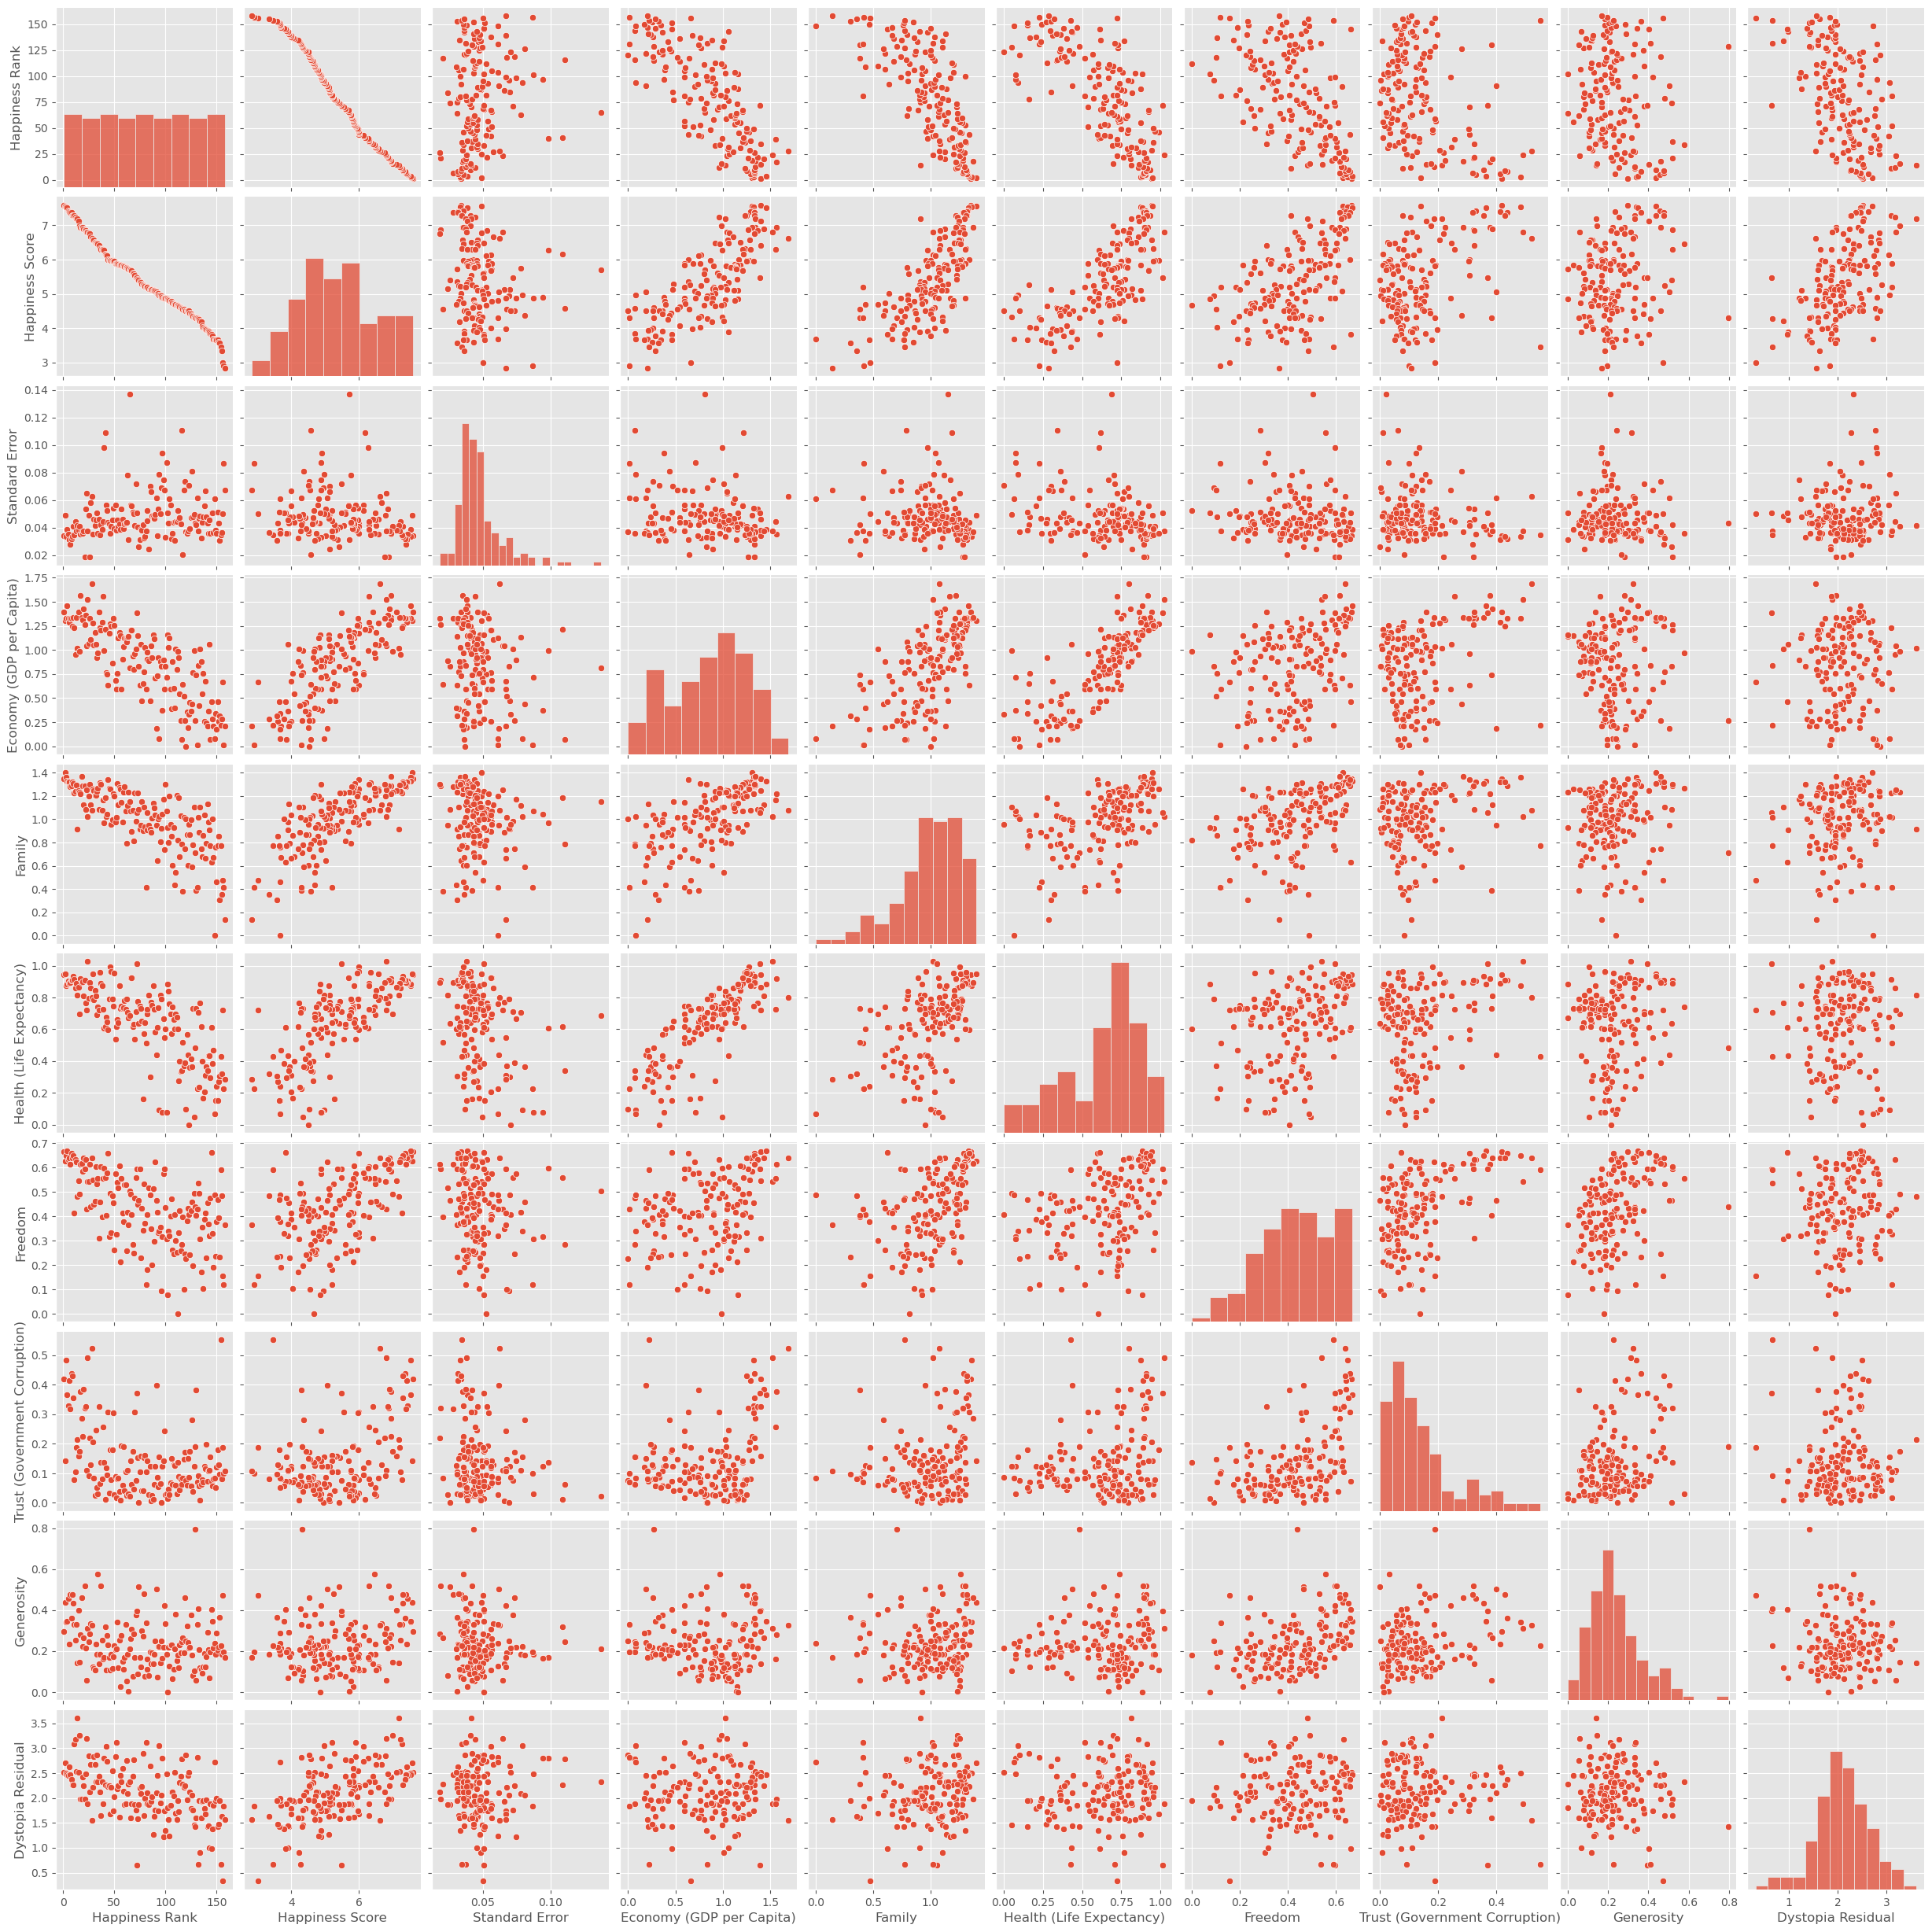

In [33]:
# Multivariate: Pair plots and facet grids.
#Pair plots
sns.pairplot(df_2015)
plt.show()

In [ ]:
#DATA VISUALIZATION
#Create a choropleth map of happiness scores
# Assuming 'world' is a GeoDataFrame of the world map
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# df_map = world.merge(df_2015, how='left', left_on='name', right_on='Country')
# df_map.plot(column='Happiness Score', cmap='coolwarm', legend=True)
# plt.title('Choropleth Map of Happiness Scores')
# plt.show()



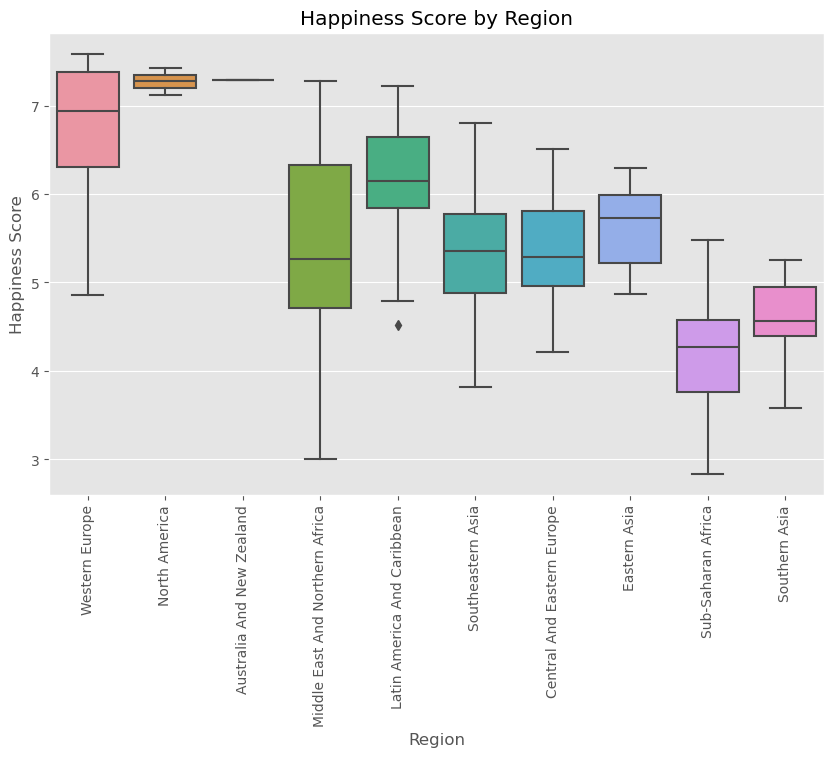

In [35]:
# Visualize distributions by region or income group

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Happiness Score', data=df_2015)
plt.xticks(rotation=90)
plt.title('Happiness Score by Region')
plt.show()

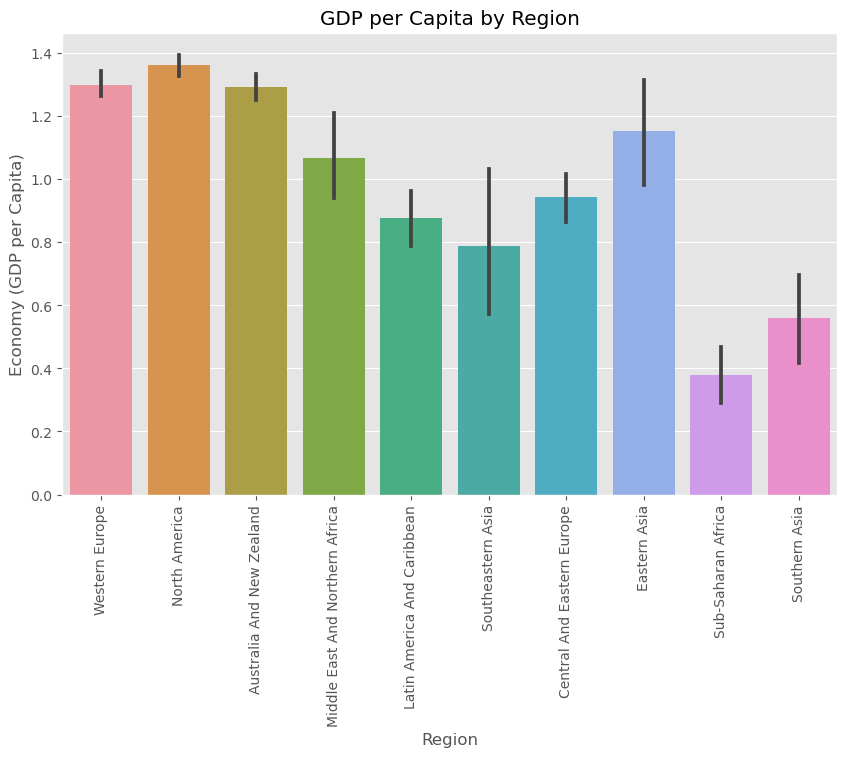

In [61]:
#relationship between Happiness Score and other factors using bar plots

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Economy (GDP per Capita)', data=df_2015)
plt.xticks(rotation=90)
plt.title('GDP per Capita by Region')
plt.show()

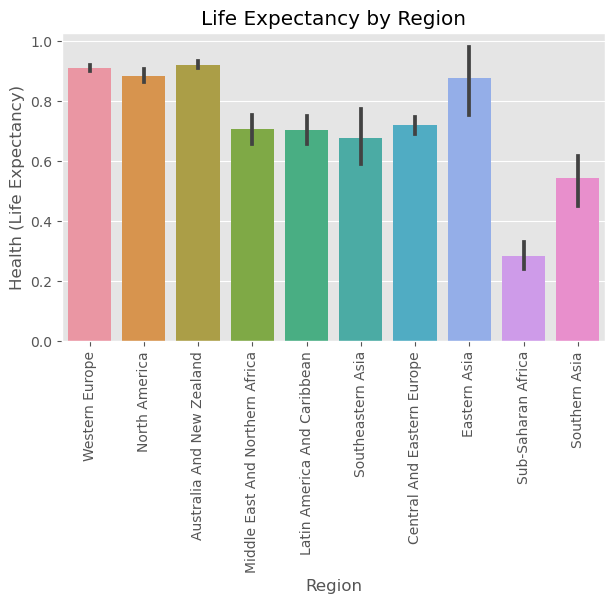

In [37]:
plt.figure(figsize=(7, 4))
sns.barplot(x='Region', y='Health (Life Expectancy)', data=df_2015)
plt.xticks(rotation=90)
plt.title('Life Expectancy by Region')
plt.show()

SUMMARY

1. Economic Prosperity and Happiness: Countries with higher GDP per capita generally experience higher happiness scores, indicating that wealth and economic security are key contributors to overall well-being.

2. Social Support: Strong social networks and a sense of community significantly enhance happiness, with countries where people feel supported by family and friends reporting higher happiness levels.

3. Health and Life Expectancy: Populations with higher life expectancy tend to be happier, highlighting the importance of good health and access to healthcare in achieving life satisfaction.

4. Personal Freedom: The perception of freedom to make life choices is strongly linked to happiness, suggesting that autonomy and personal liberty are critical for well-being.

5. Trust in Government: Lower levels of perceived corruption and higher trust in public institutions correlate with higher happiness scores, emphasizing the role of good governance.

6. Generosity: Societies that value generosity and altruism report higher happiness levels, indicating that a culture of giving and community support fosters well-being.

7. Regional Disparities: Regions like Western Europe and North America consistently report higher happiness scores compared to less economically developed regions, reflecting the influence of economic and social factors on regional well-being.